Домашнее задание.

​
Потренируем навыки, полученные на практическом занятии.

​
Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

​
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

​
Переменная, которую надо предсказать - ’MEDV’.

​
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

​
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [128]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [130]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [131]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- CRIM - уровень преступности на душу населения по городам
- ZN - доля жилой земли, зонированной для участков более 25 000 кв. Футов.
- INDUS - доля не-розничных бизнес-акров на город
- CHAS - фиктивная переменная CHAS Charles River (= 1, если тракт ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота NOX (частей на 10 миллионов)
- RM - среднее количество комнат на жилое помещение
- AGE - доля занятых собственниками единиц, построенных до 1940 года
- DIS - взвешивает расстояния до пяти бостонских центров занятости
- RAD - индекс доступности к радиальным магистралям
- TAX - ставка налога на имущество за 10 000 долларов США
- PTRATIO - Соотношение учеников и учителей PTRATIO по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.
- LSTAT - % ниже статуса населения
- MEDV - Медианная стоимость домов, занимаемых владельцами, в $ 1000

Попытаемся обучить линейную модель на основе входных переменных, ничего не меняя

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [135]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Bias: 36.459488385090005
Error: 3.270862810900314


Проведем анализ датасета

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [137]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [104]:
import math

In [141]:
# округлим количество комнат до целого, посмотрим на изменения в модели
data['RM'] = data['RM'].apply(math.ceil).astype(int)

In [142]:
# data

In [144]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.03374442e-01  5.61696646e-02  9.92486944e-03  2.93651749e+00
 -1.91971084e+01  2.43140023e+00  7.02375488e-03 -1.59576522e+00
  3.38737975e-01 -1.38697633e-02 -9.83236839e-01  7.80713920e-03
 -6.10454901e-01]
Bias: 47.218367091894535
Error: 3.4889043486613835


In [145]:
# ошибка стала больше(((

In [146]:
data['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [147]:
# ZN попробуем исключить, так как большинство значений равно нулю, это видно и из квантилей

In [148]:
data.drop(['ZN'], axis=1)

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0,0.538,7,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0,0.469,7,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0,0.469,8,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0,0.458,7,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0,0.458,8,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0,0.573,7,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0,0.573,7,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0,0.573,7,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0,0.573,7,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [149]:
X = data[['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-9.12751050e-02 -1.83262228e-02  3.00695229e+00 -1.98820149e+01
  2.58195493e+00  1.02706038e-03 -1.27219930e+00  3.12495525e-01
 -1.05056671e-02 -1.15571687e+00  7.81808954e-03 -6.06803333e-01]
Bias: 48.67627129162579
Error: 3.5859303936052553


In [150]:
# ошибка еще увеличилась((((

Посмотрим на матрицу корреляций

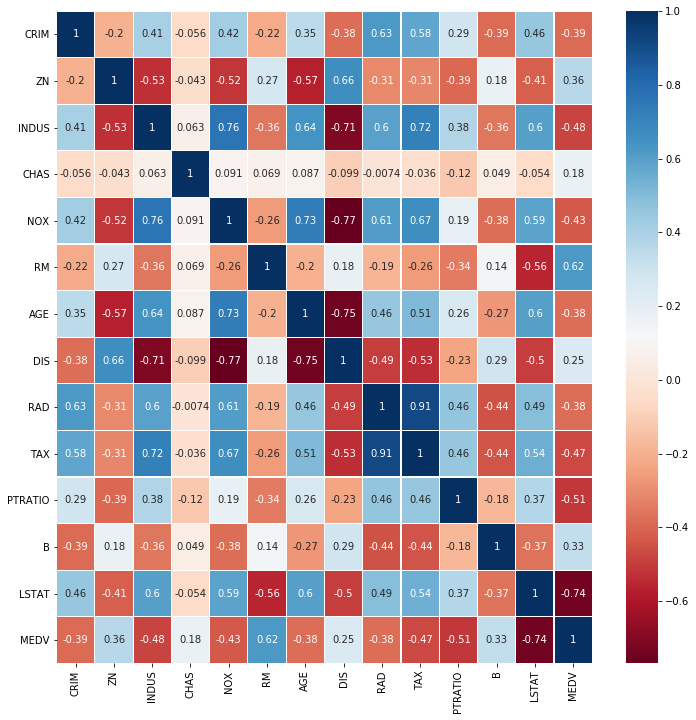

In [151]:
sns.heatmap(data.corr(),annot=True,cmap='RdBu',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [152]:
# видно, что RAD и TAX коррелируют с коэффициентом 0,91. Попробуем исключить один из них.

In [153]:
data.drop(['RAD'], axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,7,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,7,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,8,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,7,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,8,54.2,6.0622,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,7,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,7,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,7,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,7,89.3,2.3889,273,21.0,393.45,6.48,22.0


In [154]:
X = data[['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-5.01180838e-02 -9.74371280e-02  3.46331157e+00 -1.73043829e+01
  2.79701054e+00 -2.79937617e-03 -1.33183562e+00  3.17810066e-03
 -1.01881820e+00  6.77549581e-03 -6.03664316e-01]
Bias: 42.18254026455111
Error: 3.5939838355039564


In [155]:
# лучше не стало

In [156]:
# Попробуем отменить предыдущие изменнения

In [157]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [158]:
# снова удалим RAD
data.drop(['RAD'], axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


In [160]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-6.75402666e-02  3.97197489e-02 -5.84105438e-02  3.11437328e+00
 -1.52617980e+01  4.11460978e+00 -3.92675788e-03 -1.49015338e+00
  1.33416156e-03 -8.38735590e-01  8.41505674e-03 -5.16417966e-01]
Bias: 29.759382142653934
Error: 3.3122476117716944


In [161]:
# все равно не лучше

Не знаю что тут можно улучшить, мне кажется, что все переменные имеют достаточно информативный вид и тип данных, возможно тут можно вычислить на их основе дополнительные признаки,исключив исходные, понимая при этом ценообразование на недвижимость